In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

C:\Users\krist\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\krist\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('Dummy_data.csv')
df = df.drop(['customerid'],axis=1)
df = df.drop(['churn_Yes'],axis=1)
df.head()

,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,onlinesecurity_Yes,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


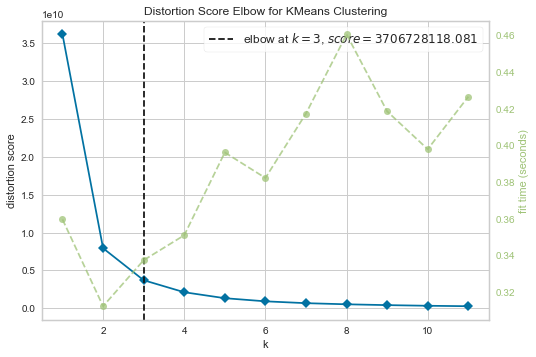

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df)

In [5]:
print(kmeans.labels_[:20])
print(len(kmeans.labels_))

[1 1 1 1 1 1 1 1 2 2 1 1 0 0 2 0 1 0 1 1]
7043


In [6]:
import numpy as np

z = []
arr = kmeans.labels_
for x in arr:
    #a = np.where(x == 2)
    z.append(x)
print(len(z))

7043


In [7]:
kmeans.cluster_centers_

array([[ 6.43848606e+01,  9.79792430e+01,  6.29777869e+03,
         4.99601594e-01,  2.16733068e-01,  7.40239044e-01,
         3.36254980e-01,  9.98406375e-01,  8.29482072e-01,
         5.76095618e-01,  7.50597610e-01,  7.49003984e-01,
         5.98406375e-01,  8.07171315e-01,  8.17529880e-01,
         7.10756972e-01,  2.29482072e-01,  7.70517928e-01,
        -8.32667268e-17,  1.81673307e-01,  3.01195219e-01,
         5.17131474e-01,  3.27490040e-01,  3.32270916e-01,
         2.88446215e-01,  5.17928287e-02],
       [ 1.82136015e+01,  4.97418103e+01,  6.85947270e+02,
         5.01436782e-01,  1.28352490e-01,  3.77155172e-01,
         2.86877395e-01,  8.91044061e-01,  2.70114943e-01,
         1.44636015e-01,  1.59243295e-01,  1.53496169e-01,
         1.41283525e-01,  1.95162835e-01,  1.95162835e-01,
         5.25862069e-01,  3.21599617e-01,  3.13457854e-01,
         3.64942529e-01,  6.86781609e-01,  1.45593870e-01,
         1.67624521e-01,  1.64990421e-01,  1.64032567e-01,
         3.45

In [8]:
kmeans.n_iter_

20

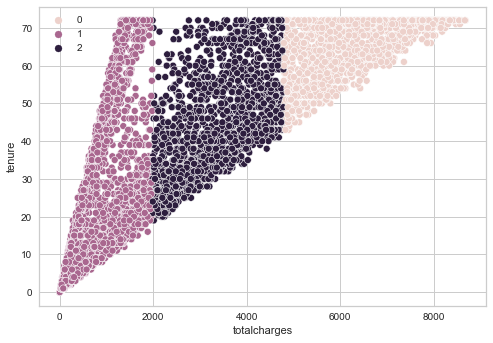

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="totalcharges", y="tenure", hue=kmeans.labels_)
plt.show()

In [20]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 4176, 2: 1612, 0: 1255})

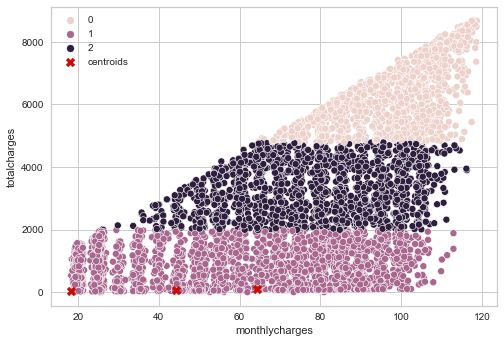

In [23]:
sns.scatterplot(data=df, x="monthlycharges", y="totalcharges", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()